In [1]:
#======================================================#
#     LAB 11 - K Means                                 #
#     Author: SHIKHAR ASTHANA                          #
#     Roll No. : 2K22/AFI/24                           #
#     Subject: Machine Learning Lab (Kavinder Sir)     #
#======================================================#

In [2]:
#Import header files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("Mall_Customers.csv")
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
#Data Preprocessing
gender_map = {
    "Male":0,
    "Female":1
}
data["Gender"] = data["Genre"].map(gender_map)

#Dropping unecessary columns
data = data.drop(["CustomerID","Genre"], axis = 1)

data.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender
0,19,15,39,0
1,21,15,81,0
2,20,16,6,1
3,23,16,77,1
4,31,17,40,1


In [5]:
def k_means(data, k, max_iter=100):
    # Normalize the data
    data_norm = (data - data.mean()) / data.std()
    
    # Initialize centroids randomly
    centroids = data_norm.sample(n=k)
    
    # Iterate until convergence or max number of iterations
    for i in range(max_iter):
        # Assign each data point to the nearest centroid
        distances = pd.DataFrame()
        for m in range(centroids.shape[0]):
            distances[f"{m}"] = np.sqrt(((data_norm - centroids.iloc[m])**2).sum(axis=1))
        distances = distances.iloc[:,:].values
        labels = np.argmin(distances, axis=1)

        # Update each centroid based on the mean of the data points in the cluster
        for j in range(k):
            centroids.iloc[j] = data_norm[labels == j].mean(axis=0)

    return labels, centroids

In [6]:
# Run K-Means clustering with 3 clusters
labels, centroids = k_means(data, 3)

# Print the labels and centroids
print(labels)
print(centroids)

[1 1 1 1 1 1 0 1 0 1 0 1 0 1 0 1 1 1 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 1 1 0 1 0 1 0 1 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0
 0 1 0 0 1 0 0 1 0 0 1 0 0 1 1 0 0 1 0 0 1 1 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0
 1 0 1 1 1 0 0 0 0 1 0 2 2 1 2 0 2 0 2 0 2 1 2 1 2 0 2 1 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 2 2 0 2 2
 2 0 2 0 2 2 2 0 2 0 2 2 2 2 2]
          Age  Annual Income (k$)  Spending Score (1-100)    Gender
160  0.873716           -0.070274               -0.644782 -0.065364
1   -0.969110           -0.662033                0.225812  0.067821
159 -0.388559            1.083667                0.982739  0.035725


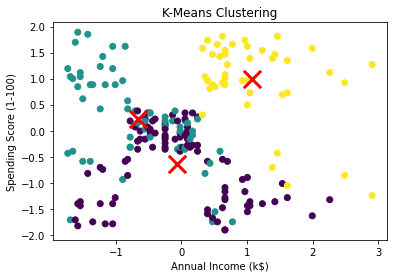

In [7]:
# Visualize the data points and centroids
data_norm = (data - data.mean()) / data.std()



fig, ax = plt.subplots()
ax.scatter(data_norm['Annual Income (k$)'], data_norm['Spending Score (1-100)'], c=labels)
ax.scatter(centroids['Annual Income (k$)'], centroids['Spending Score (1-100)'], marker='x', s=300, linewidths=3, color='r')
ax.set_xlabel('Annual Income (k$)')
ax.set_ylabel('Spending Score (1-100)')
ax.set_title('K-Means Clustering')
plt.show()